### Problem Statement

You are a data scientist / AI engineer working on a binary classification problem. You have been provided with a dataset named **`"social_network_ads.csv"`**, which includes information about users' age, gender, estimated salary, and whether they purchased a product or not. The dataset comprises the following columns:

- `user_id:` The unique identifier for each user.
- `gender:` The gender of the user.
- `age:` The age of the user.
- `estimated_salary:` The estimated salary of the user.
- `purchased:` Whether the user purchased the product or not (0 for No, 1 for Yes).
  
Your task is to use this dataset to build and evaluate a logistic regression model to predict whether a user will purchase the product based on their age, gender and estimated salary. You will also evaluate the model's performance using precision, recall, and other classification metrics.

**Dataset credits:** Akram (https://www.kaggle.com/datasets/akram24/social-network-ads)

**Import Necessary Libraries**

In [24]:
#Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Data Preparation and Exploration

1. Import the data from the `"social_network_ads.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of users' age and estimated salary using scatter plots.

In [25]:
# Step 1: Import the data from the "social_network_ads.csv" file and store it in a variable 'df'

df=pd.read_csv("social_network_ads.csv")
# Step 2: Display the number of rows and columns in the dataset

print(df.shape)
# Step 3: Display the first few rows of the dataset to get an overview
print(df.head(2))

(400, 5)
    user_id gender  age  estimated_salary  purchased
0  15624510   Male   19             19000          0
1  15810944   Male   35             20000          0


In [26]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
df.isna().sum()

user_id             0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64

Text(0, 0.5, 'Salary')

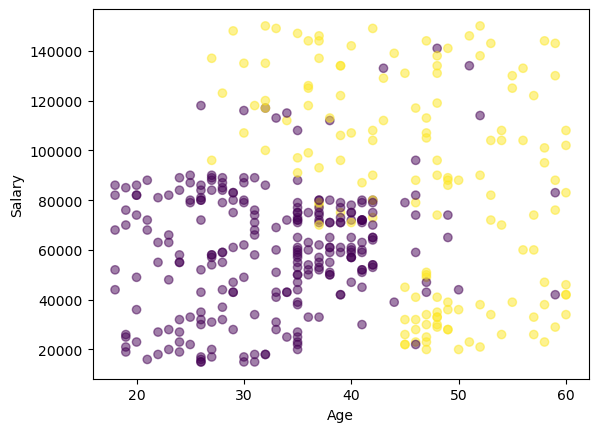

In [27]:
# Step 5: Visualize the distribution of users' age and estimated salary using scatter plots
plt.scatter(x=df.age,y=df.estimated_salary,c=df["purchased"],cmap='viridis', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Salary")

### Task 2: Model Training Using Logistic Regression

1. Encode the `gender` column (Male as 0 and Female as 1).
2. Select the features `(age, estimated_salary, gender)` and the target variable `(purchased)` for modeling.
3. Split the data into training and test sets with a test size of 30%.
4. Initialize and train a Logistic Regression model using the training data.
5. Print the model's coefficients and intercept.

In [30]:
df["gender"]=df["gender"].map({"Male" : 0 ,"Female":1})

In [31]:
df["gender"]

0      0
1      0
2      1
3      1
4      0
      ..
395    1
396    0
397    1
398    0
399    1
Name: gender, Length: 400, dtype: int64

In [19]:
# Step 1: Encode the gender column (Male as 0 and Female as 1)
df["gender"]=df["gender"].map({"Male" : 0 ,"Female":1})

# Step 2: Select the features and target variable for modeling

X=df.drop("purchased",axis=1)
y=df.purchased
# Step 3: Split the data into training and test sets with a test size of 30%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [22]:
# Step 4: Initialize and train a Logistic Regression model using the training data
from sklearn.linear_model import LogisticRegression
# Step 5: Print the model's coefficients and intercept
model=LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Task 3: Model Evaluation

1. Make predictions on the test set using the trained model.
2. Evaluate the model using a classification report, including precision, recall, and accuracy metrics.

In [21]:
# Step 1: Make predictions on the test set using the trained model
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report
# Step 2: Evaluate the model using a classification report, including precision, recall, and accuracy metrics
cm=classification_report(y_test,y_pred)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.